<a href="https://colab.research.google.com/github/Avi-nashkumar/Smaple_Project1/blob/master/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [60]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU ,PReLU ,ELU
from keras.layers import Dropout

In [61]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [62]:
dataset.shape

(10000, 14)

In [63]:
X= dataset.iloc[:,3:13]
y=dataset['Exited']

In [64]:
labelencoder = LabelEncoder()
for i in X:
  X[i]= labelencoder.fit_transform(X[i])



In [65]:
X.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,228,0,0,24,2,0,0,1,1,5068
1,217,2,0,23,1,743,0,0,1,5639
2,111,0,0,24,8,5793,2,1,0,5707
3,308,0,0,21,1,0,1,0,0,4704
4,459,2,0,25,2,3696,0,1,1,3925
5,254,2,1,26,8,2674,1,1,0,7531
6,431,0,1,32,7,0,1,1,1,513
7,8,1,0,11,4,2781,3,1,0,5978
8,110,0,1,26,4,4962,1,0,1,3718
9,293,0,1,9,2,4450,0,1,1,3550


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [67]:
X_train.shape

(8000, 10)

In [68]:
Sc= StandardScaler()
X_train = Sc.fit_transform(X_train)
X_test = Sc.fit_transform(X_test)

In [69]:
#Initialising the ANN
classifier= Sequential()

In [70]:
#Adding the input layer and the first hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform',activation='relu',input_dim=10))

In [ ]:
#Adding dropout function
classifier.add(Dropout(0.3))

In [71]:
#Adding second hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform',activation='relu'))

In [72]:
#Adding output layer
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform',activation='sigmoid'))

In [73]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 6)                 66        
_________________________________________________________________
dense_13 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 7         
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


In [74]:
# Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [75]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs=100)

Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.6234 - accuracy: 0.7264 - val_loss: 0.5219 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5125 - accuracy: 0.7902 - val_loss: 0.4809 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4650 - accuracy: 0.7983 - val_loss: 0.4619 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4439 - accuracy: 0.8004 - val_loss: 0.4521 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4434 - accuracy: 0.7933 - val_loss: 0.4475 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4416 - accuracy: 0.7947 - val_loss: 0.4445 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4351 - accuracy: 0.7981 - val_loss: 0.4427 - val_accuracy: 0.7955

In [78]:
y_pred= classifier.predict(X_test)
y_pred= (y_pred>0.5)

In [80]:
cm= confusion_matrix(y_test,y_pred)
cm

array([[1533,   62],
       [ 206,  199]])

In [81]:
accuracy= accuracy_score(y_pred,y_test)
accuracy

0.866

In [83]:
print(model_history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


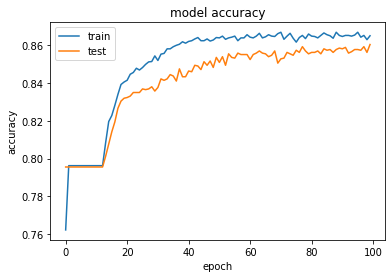

In [84]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

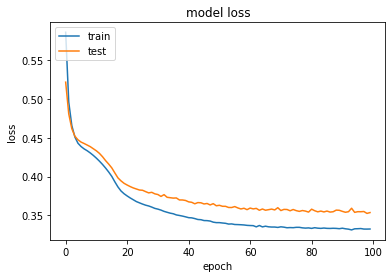

In [85]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()